Resumes:
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  

Job Descriptions:
  company_name                                    job_description  \
0       Google  minimum qualifications\nbachelors degree or eq...   
1        Apple  description\nas an asc you will be hi

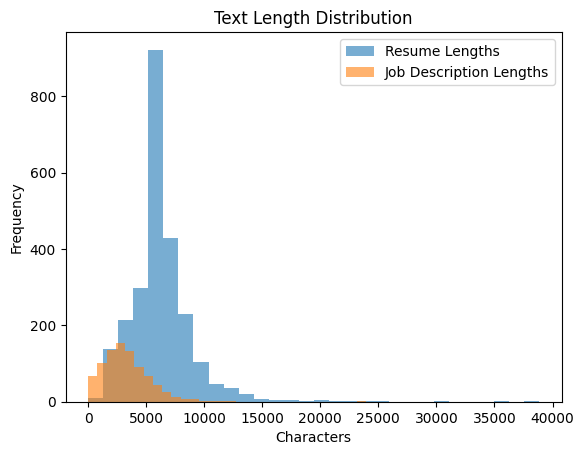

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

resume_path = "../data/raw/Resume.csv"
job_path = "../data/raw/training_data.csv"

resume_df = pd.read_csv(resume_path)
print("Resumes:")
print(resume_df.head())

job_df = pd.read_csv(job_path)
print("\nJob Descriptions:")
print(job_df.head())

resume_lengths = resume_df["Resume_str"].dropna().str.len()
job_lengths = job_df["job_description"].dropna().str.len()

plt.hist(resume_lengths, bins=30, alpha=0.6, label="Resume Lengths")
plt.hist(job_lengths, bins=30, alpha=0.6, label="Job Description Lengths")
plt.legend()
plt.title("Text Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()


In [2]:
import pandas as pd

resume_path = "../data/raw/Resume.csv"
job_path = "../data/raw/training_data.csv"

resume_df = pd.read_csv(resume_path)
job_df = pd.read_csv(job_path)

print("Resume DataFrame:")
display(resume_df.head())

print("Job Description DataFrame:")
display(job_df.head())


Resume DataFrame:


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


Job Description DataFrame:


,company_name,job_description,position_title,description_length,model_response
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo..."
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ..."
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus..."
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs..."
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo..."


In [3]:
print("Resume DataFrame Info:")
resume_df.info()

print("\nJob DataFrame Info:")
job_df.info()

print("\nMissing values in Resume:")
print(resume_df.isnull().sum())

print("\nMissing values in Job Description:")
print(job_df.isnull().sum())


Resume DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB

Job DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   company_name        853 non-null    object
 1   job_description     853 non-null    object
 2   position_title      853 non-null    object
 3   description_length  853 non-null    int64 
 4   model_response      853 non-null    object
dtypes: int64(1), object(4)
memory usage: 33.4+ KB

Missing values in Resume:
ID             0
Resume_str     0
R

<Axes: title={'center': 'Top 20 Position Titles'}, xlabel='position_title'>

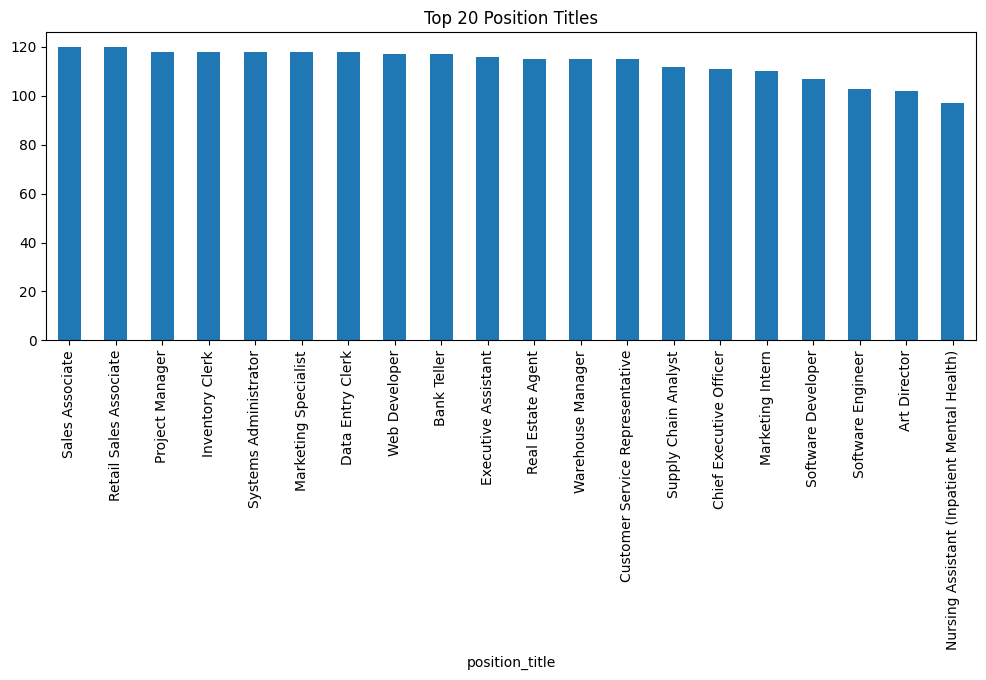

In [4]:
# Resume Category 
resume_df["Category"].value_counts().plot(kind="bar", figsize=(12, 4), title="Resume Category Distribution")

# Position Title Top 20
top_titles = job_df["position_title"].value_counts().head(20)
top_titles.plot(kind="bar", figsize=(12, 4), title="Top 20 Position Titles")


In [5]:
print("Sample Resume:")
print(resume_df["Resume_str"].iloc[0])


print("\nSample Job Description:")
print(job_df["job_description"].iloc[0])

if "model_response" in job_df.columns:
    print("\nModel Response:")
    print(job_df["model_response"].iloc[0])


Sample Resume:
         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory cont

### Exploration Summary

- The Resume dataset contains X resumes across Y job categories.
- The Job Description dataset includes Z unique positions from N companies.
- Text length distributions show resumes tend to be longer than job descriptions.
- Categories and position titles are highly imbalanced — embedding or sampling should account for that.
- HTML in `Resume_html` can be ignored; `Resume_str` is a cleaner source.


### Check Merged and Cleaned Dataset


In [7]:
import pandas as pd

df = pd.read_csv("../data/processed/merged_cleaned_dataset.csv")
print(df.columns)
print(df.head())


Index(['text', 'label', 'source'], dtype='object')
                                                text label  source
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...    HR  resume
1           HR SPECIALIST, US HR OPERATIONS      ...    HR  resume
2           HR DIRECTOR       Summary      Over 2...    HR  resume
3           HR SPECIALIST       Summary    Dedica...    HR  resume
4           HR MANAGER         Skill Highlights  ...    HR  resume
